# Face Detection using Histogram of Oriented Gradients algorithm
## Author: Ankit Gupta

In [1]:
# install cv2 and dlib before proceeding 

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import misc
import dlib

import cv2
import time

In [11]:
# download and extract a pre-trained face detection model from 
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

predictor_model = "face_detection/shape_predictor_68_face_landmarks.dat"

# Take the image file name from the command line
file_name = 'face_detection/some_face.jpg'

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

win = dlib.image_window()

# Load the image
# image = misc.imread(file_name) # for colored
image = misc.imread(file_name, 'gray').astype('uint8') # for grayscale

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), file_name))

# Show the desktop window with the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

    # Detected faces are returned as an object with the coordinates 
    # of the top, left, right and bottom edges
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    # Draw a box around each face we found
    win.add_overlay(face_rect)

    # Get the the face's pose
    pose_landmarks = face_pose_predictor(image, face_rect)
    parts = pose_landmarks.parts()

    # Draw the face landmarks on the screen.
    win.add_overlay(pose_landmarks)


/home/ankitg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Found 1 faces in the image file face_detection/some_face.jpg
- Face #0 found at Left: 117 Top: 142 Right: 340 Bottom: 365


(130, 190) (132, 217) (136, 243) (140, 269) (149, 294) (164, 315) (184, 333) (207, 349) (231, 353) (255, 348) (278, 332) (297, 313) (312, 292) (321, 268) (324, 242) (329, 216) (331, 191) (144, 175) (159, 166) (178, 165) (196, 169) (214, 177) (250, 177) (267, 169) (285, 165) (303, 166) (318, 175) (232, 195) (232, 213) (232, 231) (232, 249) (214, 259) (223, 263) (231, 266) (240, 263) (249, 260) (166, 197) (177, 190) (192, 191) (203, 200) (190, 203) (176, 203) (260, 200) (271, 191) (286, 191) (297, 198) (287, 203) (273, 203) (195, 291) (210, 285) (223, 281) (233, 284) (242, 281) (255, 285) (269, 291) (255, 304) (242, 309) (232, 310) (222, 309) (209, 304) (203, 293) (223, 293) (232, 294) (242, 293) (262, 293) (242, 293) (232, 294) (222, 293) 

(-0.5, 459.5, 455.5, -0.5)

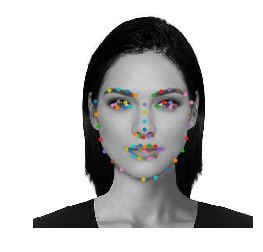

In [12]:
# plotting the estimated landmarks

for i in range(68):
    print(parts[i], end=' ')

plt.imshow(image, 'gray')

for i in range(68):
    plt.plot(parts[i].x, parts[i].y, '.')
plt.axis('off')

(-0.5, 459.5, 455.5, -0.5)

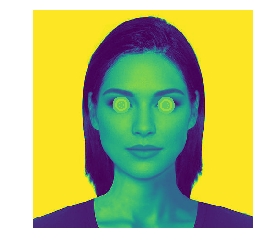

In [13]:
# filter to add funny balls around eye centers

import random

def add_glasses(face, lx, ly, rx, ry, cx, cy):
    color1 = random.randrange(0, 256)
    color2 = random.randrange(0, 256)
    
    face_alt = face.copy()
    
    #line joining the glasses
    #for epsilon in np.arange(0, 1, 0.001):
    #    x = int(np.round(lx + epsilon*(rx - lx)))
    #    y = int(np.round(ly + epsilon*(ry - ly)))
    #    face_alt[y, x] = 255
    
    #glasses
    r = int(np.sqrt((lx-cx)**2 + (ly-cy)**2))
    for dx in range(-r, r):
        for dy in range(-r, r):
            dis_sq = dx*dx + dy*dy
            if  (r*r/16 <= dis_sq <= r*r/12) or (r*r/4 <= dis_sq <= r*r/2):
                face_alt[int(ly + dy), int(lx + dx)] = color1
                face_alt[int(ry + dy), int(rx + dx)] = color1
            elif dis_sq <= r*r:
                face_alt[int(ly + dy), int(lx + dx)] = color2
                face_alt[int(ry + dy), int(rx + dx)] = color2
    
    return face_alt

left_eye_outer = parts[36]
left_eye_inner = parts[39]
right_eye_outer = parts[45]
right_eye_inner = parts[42]
lx = (left_eye_outer.x + left_eye_inner.x) / 2
ly = (left_eye_outer.y + left_eye_inner.y) / 2
rx = (right_eye_outer.x + right_eye_inner.x) / 2
ry = (right_eye_outer.y + right_eye_inner.y) / 2
cx = left_eye_outer.x
cy = left_eye_outer.y

#plotting the face with glasses
plt.imshow(add_glasses(image, lx, ly, rx, ry, cx, cy))
plt.axis('off')
#plt.imshow(image)
#plt.plot(cx, cy, '.')

In [14]:
# adding the above filter to a camera feed

cap = cv2.VideoCapture(0) # to change the camera use 1 instead of 0

win = dlib.image_window()

while(cap.isOpened()):
    ret, frame = cap.read()
    # crop the frame to relevant size
    #frame = frame[:-100, 350:-400, :]
    
    #convert tp gray scale for easily processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #convert to rgb to display
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # clear the previous overlays if any
    win.clear_overlay()

    detected_faces = face_detector(gray, 1)

    for i, face_rect in enumerate(detected_faces):
        # Draw a box around each face we found
        #win.add_overlay(face_rect)

        # Get the the face's pose
        pose_landmarks = face_pose_predictor(gray, face_rect)

        parts = pose_landmarks.parts()
        left_eye_outer = parts[36]
        left_eye_inner = parts[39]
        right_eye_outer = parts[45]
        right_eye_inner = parts[42]
        lx = (left_eye_outer.x + left_eye_inner.x) / 2
        ly = (left_eye_outer.y + left_eye_inner.y) / 2
        rx = (right_eye_outer.x + right_eye_inner.x) / 2
        ry = (right_eye_outer.y + right_eye_inner.y) / 2
        cx = left_eye_outer.x
        cy = left_eye_outer.y

        frame = add_glasses(frame, lx, ly, rx, ry, cx, cy)

        # Draw the face landmarks on the screen.
        #win.add_overlay(pose_landmarks)

    win.set_image(frame)      

cap.release()

KeyboardInterrupt: 

In [15]:
# releasing the camera feed

cap.release()

In [7]:
# adding filter to a video file

cap = cv2.VideoCapture('face_detection/faces_video.avi')
win = dlib.image_window()

mod = 2 # add filter to every 'mod'th frame 

counter = 0
counter1 = 0

while(cap.isOpened()):
    counter += 1
    counter1 += 1
    #time.sleep(1/60)    # pause 5.5 seconds
    ret, frame = cap.read()
    # crop the frame to relevant size
    frame = frame[:-100, 350:-400, :]
    
    #convert tp gray scale for easily processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #convert to rgb to display
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    if counter1 <= 368:
        continue
    
    if counter % mod == 0 or True:
        # face detection only on every mod'th frame
        counter = 0
        
        # clear the previous overlays if any
        #win.clear_overlay()

        detected_faces = face_detector(gray, 1)

        for i, face_rect in enumerate(detected_faces):
            # Draw a box around each face we found
            #win.add_overlay(face_rect)

            # Get the the face's pose
            pose_landmarks = face_pose_predictor(gray, face_rect)

            parts = pose_landmarks.parts()
            left_eye_outer = parts[36]
            left_eye_inner = parts[39]
            right_eye_outer = parts[45]
            right_eye_inner = parts[42]
            lx = (left_eye_outer.x + left_eye_inner.x) / 2
            ly = (left_eye_outer.y + left_eye_inner.y) / 2
            rx = (right_eye_outer.x + right_eye_inner.x) / 2
            ry = (right_eye_outer.y + right_eye_inner.y) / 2
            cx = left_eye_outer.x
            cy = left_eye_outer.y

            frame = add_glasses(frame, lx, ly, rx, ry, cx, cy)
            
            # Draw the face landmarks on the screen.
            #win.add_overlay(pose_landmarks)

    win.set_image(frame)      

#cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
# realeasing the feed

cap.release()

## Inner workings of the HOG algorithm

In [8]:
# Inner workings of a HOG algorithm

# 3 2 1
# 4   0
# 5 6 7

h, w = image.shape
side = 8

grad = np.zeros(image.shape)[1:-1, 1:-1].astype('int')  # directions of inc darkness
intensity_diffs = np.zeros(image.shape)[1:-1, 1:-1].astype('float32')  # intensity changes

print(image.shape, grad.shape)

for i_g in range(h-2):
    for j_g in range(w-2):
        i, j = i_g + 1, j_g + 1
        neighbors = [image[i, j+1], image[i-1, j+1], image[i-1, j], image[i-1, j-1], 
                     image[i, j-1], image[i+1, j-1], image[i+1, j], image[i+1, j+1]
                    ]
        grad[i_g, j_g] = int(np.argmin(neighbors))
        intensity_diffs[i_g, j_g] = np.abs(image[i, j] - np.min(neighbors))

max_dirs_mat = []
intensity_diff_mat = []

for i in range( (h-2) // side):
    max_dirs = []
    diffs = []

    for j in range( (w-2) // side):
        square = grad[i*side: (i+1)*side, j*side: (j+1)*side]
        intensity_diffs_square = intensity_diffs[i*side: (i+1)*side, j*side: (j+1)*side]
        if square.shape != (side, side):
            # not perfect square
            continue
        # count directions of inc darkness in the square
        dir_counts = [0]*8
        for i_s in range(side):
            for j_s in range(side):
                dir_counts[square[i_s, j_s]] += 1
        max_dir = int(np.argmax(dir_counts))
        max_dirs.append(max_dir)
        diffs.append(np.mean(intensity_diffs_square))

    max_dirs_mat.append(max_dirs)
    intensity_diff_mat.append(diffs)


max_dirs_mat = np.array(max_dirs_mat, 'int')
intensity_diff_mat = np.array(intensity_diff_mat, 'float32')

print(max_dirs_mat.shape)

#for i in range(len(max_dirs_mat)):
#    for j in range(len(max_dirs_mat[0])):
        #print(max_dirs_mat[i, j], end=' ')
#        print(intensity_diff_mat[i, j], end=' ')
#    print()
    
    
#square = image[200: 200+side, 200: 200+side]
#plt.imshow(square, 'gray')
 


(456, 460) (454, 458)

/home/ankitg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars



(56, 57)


(-0.5, 284.5, 279.5, -0.5)

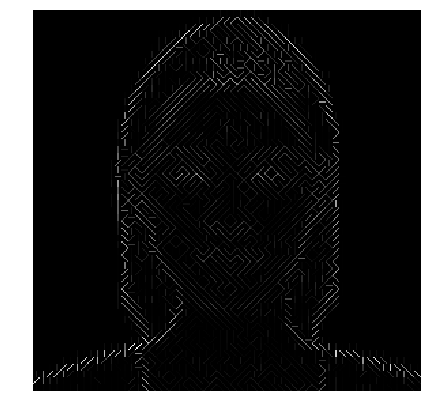

In [9]:
# grouping 5 x 5 pixels into one by taking majority of gradient directions

def pixels(a=0):
    m = np.zeros((5, 5)).astype('int')
    m[2, 2] = 255
    
    # WE WILL INSTEAD DRAW THE TANGENTS (ORTHOGONAL TO GRADS)
    if a in [2, 6]: #[0, 4]:
        m[2, 0] = m[2, 1] = m[2, 3] = m[2, 4] = 255
    elif a in [3, 7]: #[1, 5]:
        m[4, 0] = m[3, 1] = m[1, 3] = m[0, 4] = 255
    elif a in [0, 4]: #[2, 6]: 
        m[0, 2] = m[1, 2] = m[3, 2] = m[4, 2] = 255
    else:
        m[0, 0] = m[1, 1] = m[3, 3] = m[4, 4] = 255
    return m

pixel_mat = np.zeros((5*len(max_dirs_mat), 5*len(max_dirs_mat[0])))

for i in range(len(max_dirs_mat)):
    for j in range(len(max_dirs_mat[0])):
        #pixel_mat[i*5: (i+1)*5, j*5: (j+1)*5] = pixels(max_dirs_mat[i, j])
        pixel_mat[i*5: (i+1)*5, j*5: (j+1)*5] = pixels(max_dirs_mat[i, j]) * intensity_diff_mat[i, j]

plt.figure(figsize=(7, 7))
plt.imshow(pixel_mat, 'gray')
plt.axis('off')